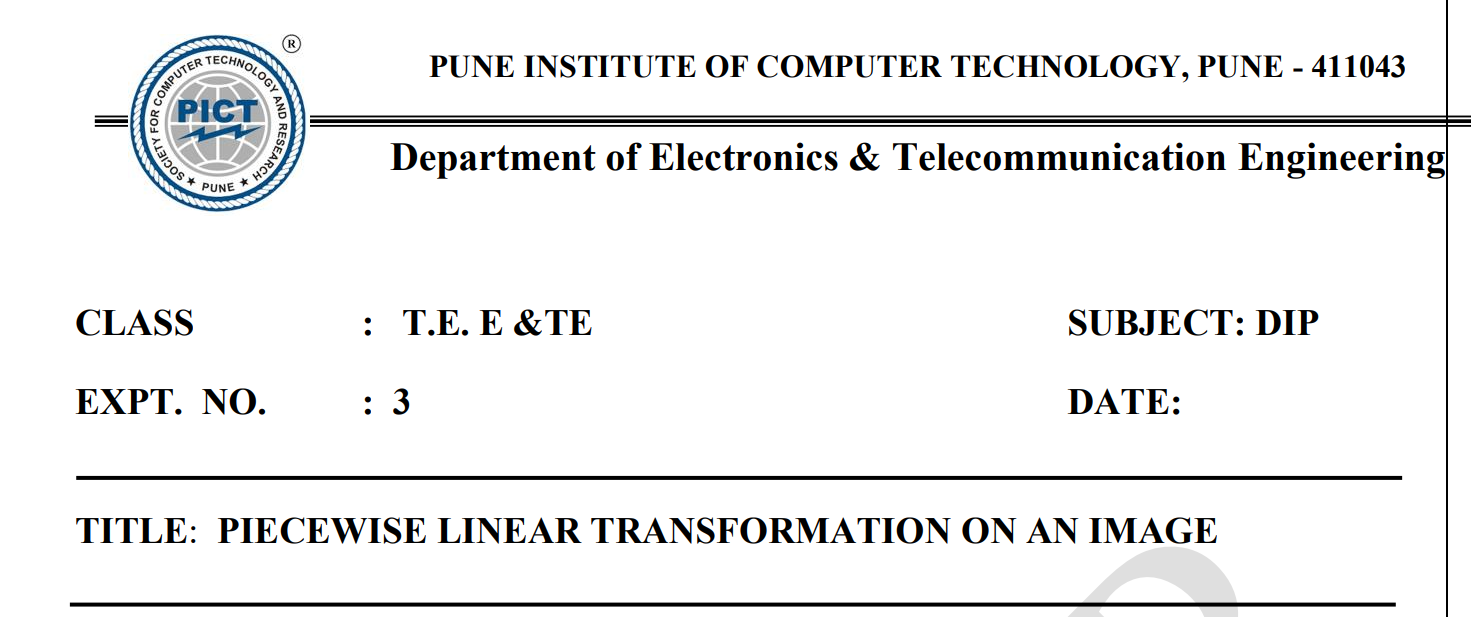

In [ ]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

print("OpenCV Version: ",cv2.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("NumPy version:", np.__version__)

def imshow(title: str = "",
           image: np.ndarray = None,
           subplot: bool = False,
           row: int = 0, col: int = 0, num: int = 0) -> None:
    """
    Display an image using matplotlib.pyplot.

    Parameters:
    - title (str): Title to be displayed above the image.
    - image (np.ndarray): Input image as a NumPy array (BGR format).
    - subplot (bool): If True, the image is displayed as a subplot.
    - row (int): Row position for the subplot.
    - col (int): Column position for the subplot.
    - num (int): Subplot number.

    Returns:
    None

    Example:
    imshow(title="Example Image", image=my_image)
    """
    if subplot:
        plt.subplot(row, col, num)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

OpenCV Version:  4.8.0
Matplotlib version: 3.7.1
NumPy version: 1.23.5


## Gray-level Slicing

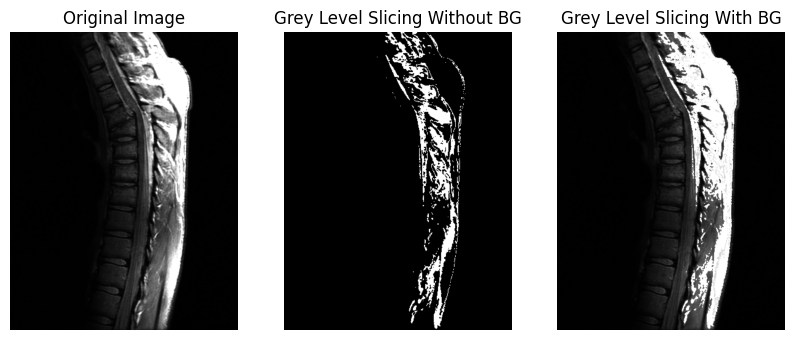

In [ ]:
def gray_level_slicing(path, lower, upper, bg = False, THRESHOLD = 256):
    image = cv2.imread(path,cv2.COLOR_BGR2GRAY)
    rows, cols = image.shape
    for row in range(rows):
        for col in range(cols):
            if lower <= image[row][col] <= upper:
                image[row][col] = THRESHOLD-1
            else:
                if bg:
                    pass
                else:
                    image[row][col] = 0
    return image

plt.figure(figsize=(10,5))
path = "/content/drive/MyDrive/dip_Images/Fig0308(a)(fractured_spine).tif"
img_sliced_nbg = gray_level_slicing(path, 100, 200)
img_sliced_bg = gray_level_slicing(path, 100, 200, bg = True)
img = cv2.imread(path, cv2.COLOR_BGR2GRAY)
imshow("Original Image", img, subplot=True, row=1, col=3, num=1)
print()
imshow("Grey Level Slicing Without BG", img_sliced_nbg, subplot=True, row=1, col=3, num=2)
print()
imshow("Grey Level Slicing With BG", img_sliced_bg, subplot=True, row=1, col=3, num=3)

## Bit Plane Slicing

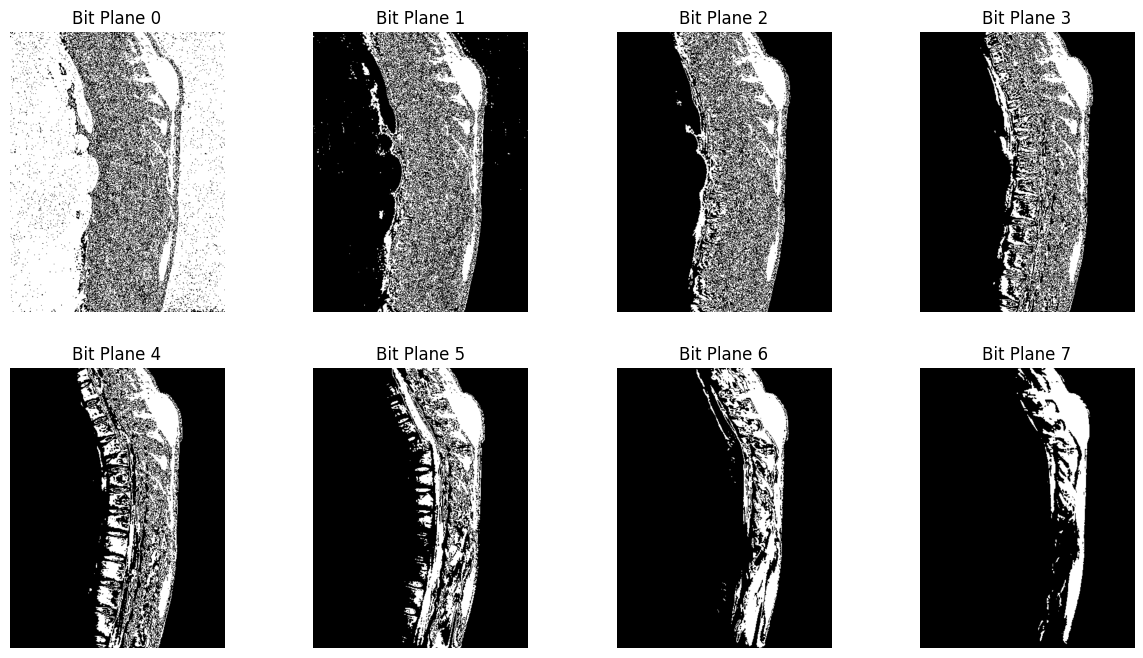

In [ ]:
def bit_plane_slicing(path):
    for bit in range(8):
        image = cv2.imread(path,cv2.COLOR_BGR2GRAY)
        rows, cols = image.shape
        for row in range(rows):
            for col in range(cols):
                binary = bin(image[row][col])[2:]
                image[row][col] = 255 if ("0"*(8-len(binary)) + binary)[::-1][bit] == "1" else 0
        imshow(f"Bit Plane {bit}", image, subplot=True, row = 2, col = 4, num=bit+1)
plt.figure(figsize=(15,8))
bit_plane_slicing(path)

## Contrast Streaching

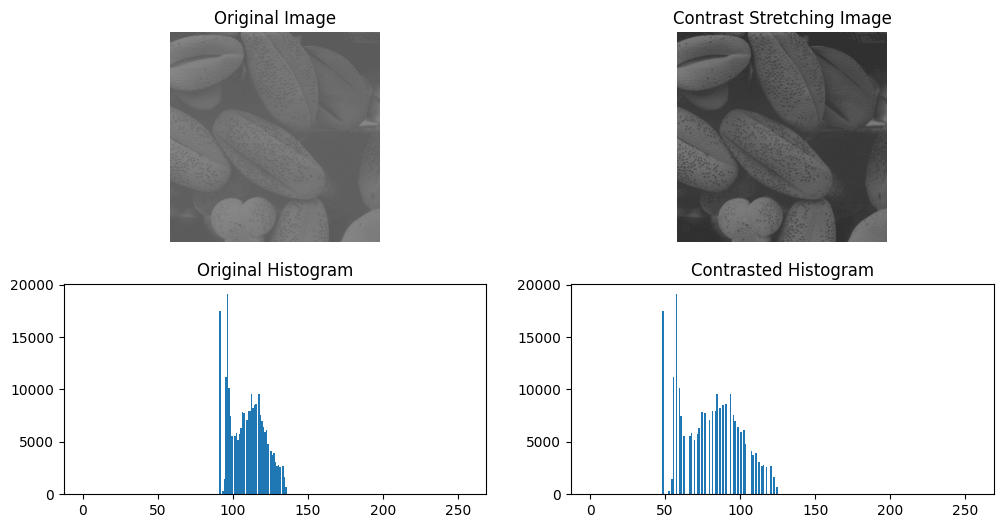

In [ ]:
def contrast_stretching(path=None, s1=30, s2 = 150, r1=80, r2=150, L=255):
    img = cv2.imread(path,cv2.COLOR_BGR2GRAY)
    imshow("Original Image", img, subplot=True, row = 2, col = 2, num=1)
    plt.subplot(2,2,3)
    plt.title("Original Histogram")
    plt.hist(img.ravel(), 256, [0,256])

    a = s1/r1
    b = (s2-s1)/(r2-r1)
    g = (L-s2)/(L-r2)

    rows, cols = img.shape
    for row in range(rows):
        for col in range(cols):
            if img[row][col] <= r1:
                img[row][col] = a*img[row][col]
            elif img[row][col] >r1 and img[row][col] <=r2:
                r = img[row][col]
                img[row][col] = b*(r-r1) + s1
            else:
                r = img[row][col]
                img[row][col] = g*(r-r2) + s2
    imshow("Contrast Stretching Image", img, subplot=True, row = 2, col = 2, num=2)
    plt.subplot(2,2,4)
    plt.title("Contrasted Histogram")
    plt.hist(img.ravel(),256,[0,256])
plt.figure(figsize=(12,6))
path = "/content/drive/MyDrive/dip_Images/Fig0316(2)(2nd_from_top).tif"
contrast_stretching(path = path)

In [ ]:
!wget https://raw.githubusercontent.com/Prem07a/VisionCraft/main/VisionCraft.py

--2024-02-08 13:02:10--  https://raw.githubusercontent.com/Prem07a/VisionCraft/main/VisionCraft.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8387 (8.2K) [text/plain]
Saving to: ‘VisionCraft.py’

VisionCraft.py      100%[===================>]   8.19K  --.-KB/s    in 0s      

2024-02-08 13:02:10 (82.0 MB/s) - ‘VisionCraft.py’ saved [8387/8387]

